In [822]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%config InlineBackend.figure_format = 'retina'
matplotlib.style.use('fivethirtyeight')
sns.set_style('white')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
rc={'font.size': 22, 'axes.labelsize': 22, 'legend.fontsize': 22.0, 
    'axes.titlesize': 22, 'xtick.labelsize': 12, 'ytick.labelsize': 22,
    'font.family':'monospace', 'font.monospace': 'Courier New'}
plt.rcParams.update(**rc)
sns.set(rc=rc)
# pd.set_option('display.notebook_repr_html', True)

# def _repr_latex_(self):
#     return "\centering{%s}" % self.to_latex()

# pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame

In [823]:
weather_data = pd.read_csv('../res/nyc_subway_weather.csv')
# display(weather_data.head())

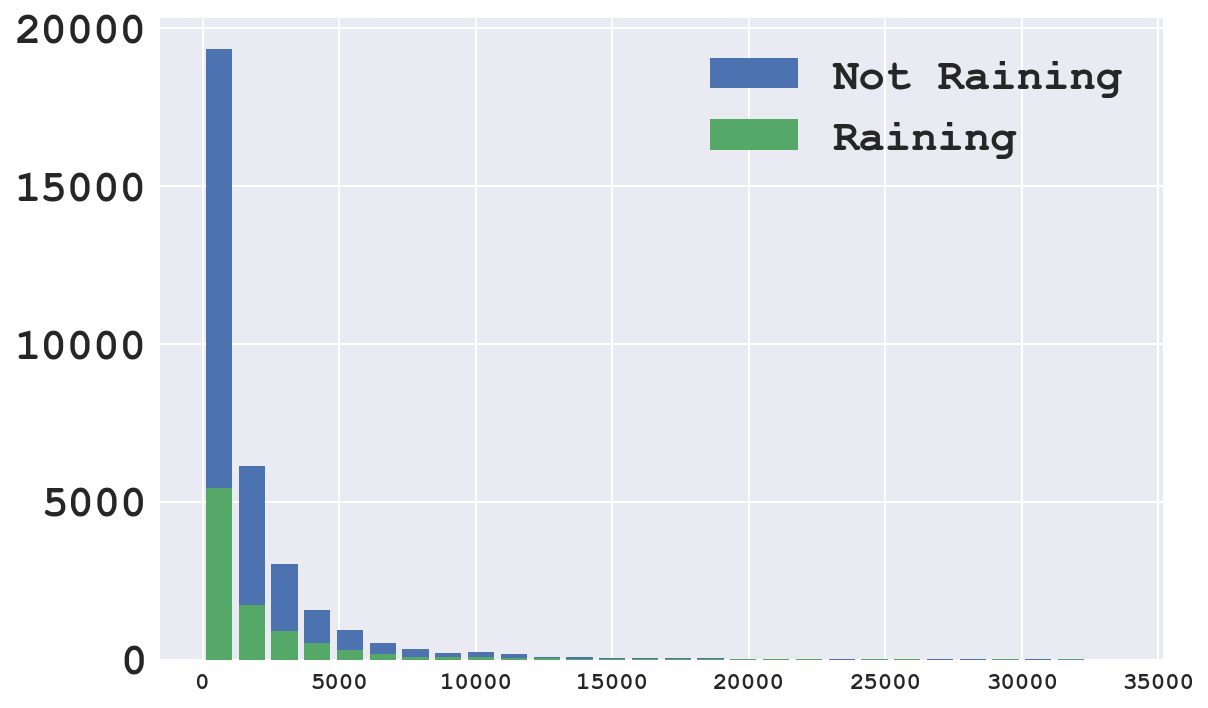

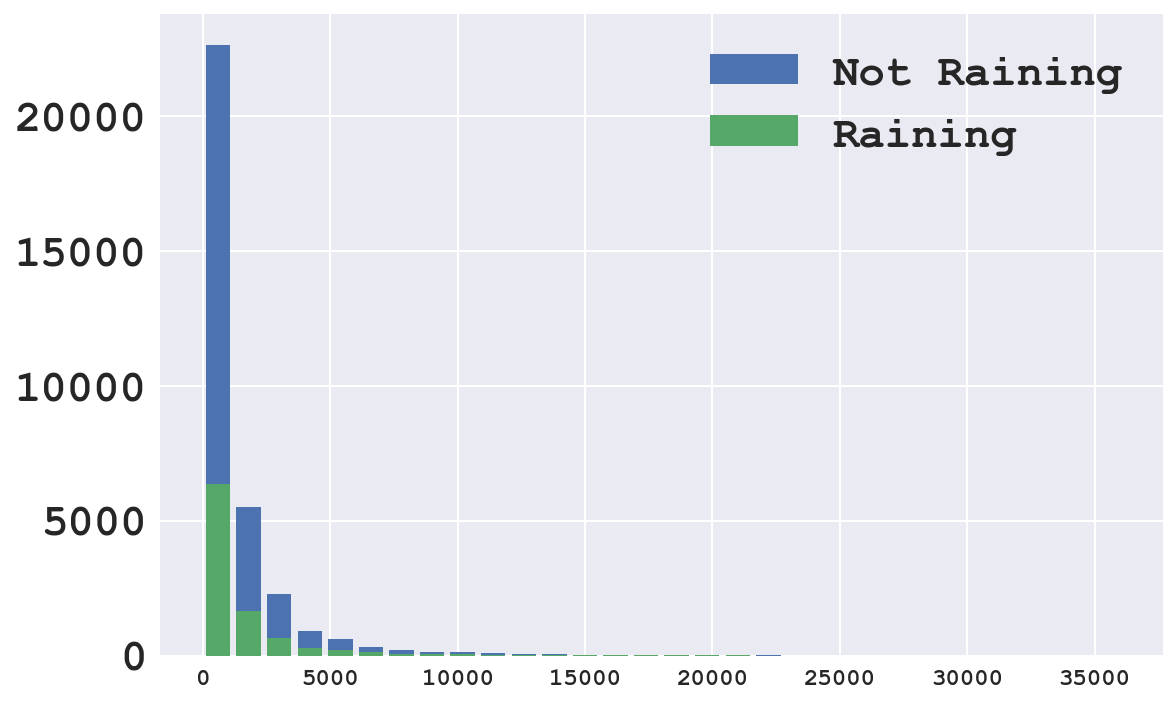

In [800]:
weather_data['rain'] = weather_data['rain'].apply(lambda x: 'Raining' if x else 'Not Raining')
def create_histogram_from_groups(groupby_parameter, metric, bin_width):
    plt.figure()
    for key, grp in weather_data.groupby(groupby_parameter):
        ma = grp[metric].max()
        mi = grp[metric].min()
        bin_width = bin_width
        bin_numbers = int(round((ma - mi) / bin_width))
        offset = 2
        bins = [int(i * bin_width + mi) for i in range(bin_numbers + offset)]
        plt.hist(grp[metric], bins, histtype='bar', rwidth=0.8, label=key)
    plt.legend(loc='best')
    plt.show()

create_histogram_from_groups('rain', 'ENTRIESn_hourly', 1200)
create_histogram_from_groups('rain', 'EXITSn_hourly', 1200)

In [749]:
# weather_data['rain'] = weather_data['rain'].apply(lambda x: 'Raining' if x else 'Not Raining')
# def create_histogram_from_groups(groupby_parameter, metric, bin_width):
#     # create subplots (where ax = (ax[0],ax[1]), i.e. a tuple)
#     f, ax = plt.subplots(1, 2, sharey=True)
#     ind = 0
#     for key, grp in weather_data.groupby(groupby_parameter):
#         # need to make more generic
#         title = ' '.join([word.capitalize() for word in metric.replace('_',' ').replace('n ',' ').split()])
#         ma = grp[metric].max()
#         mi = grp[metric].min()
#         bin_width = bin_width
#         bin_numbers = int(round((ma - mi) / bin_width))
#         offset = 2
#         bins = [int(i * bin_width + mi) for i in range(bin_numbers + offset)]
#         ax[ind].hist(grp[metric], bins, histtype='bar', rwidth=0.8, label="")
#         # labels
#         ax[ind].set_xlabel(key)
#         if ind == 0: ax[ind].set_ylabel('Count')
#         ind += 1
#     plt.legend(loc='best')
#     # title
#     f.suptitle(title)
#     plt.show()

# create_histogram_from_groups('rain', 'ENTRIESn_hourly', 1200)
# create_histogram_from_groups('rain', 'EXITSn_hourly', 1200)

In [750]:
daily_travel_total = weather_data.groupby('day_week')['ENTRIESn_hourly', 'EXITSn_hourly'].sum()['ENTRIESn_hourly']

In [751]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_in_data = [days[index] for index, values in daily_travel_total.iteritems()]

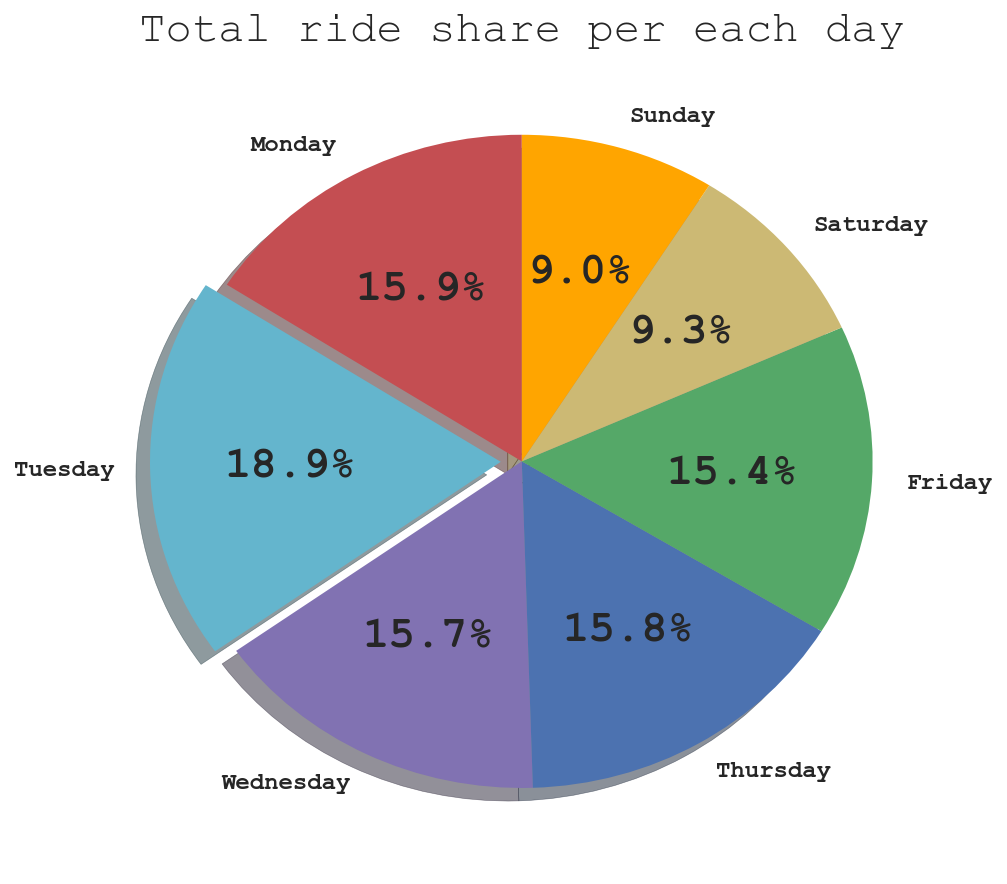

In [752]:
ex = tuple((daily_travel_total / daily_travel_total.max() == 1.0) * 0.06)
rcParams['figure.figsize'] = 7, 7
cols = ['r', 'c', 'm', 'b', 'g', 'y', 'orange']
plt.pie(daily_travel_total, labels=days_in_data, colors=cols, startangle=90, shadow=True, explode=ex, autopct='%1.1f%%')
plt.title('Total ride share per each day')
plt.show()

In [753]:
k = weather_data.groupby('station', as_index=True)['ENTRIESn_hourly', 'EXITSn_hourly'].median()
# display(k)
# top_entry_station = k['ENTRIESn_hourly'].argmax()
top_exit_stations = k['EXITSn_hourly'].sort_values(ascending=False)[:5].index.values
top_entry_stations = k['ENTRIESn_hourly'].sort_values(ascending=False)[:5].index.values

# top_entry_stations

In [754]:
# weather_data.columns
scatter_df = weather_data.groupby(['latitude', 'longitude'])['ENTRIESn_hourly', 'EXITSn_hourly'].mean().reset_index()

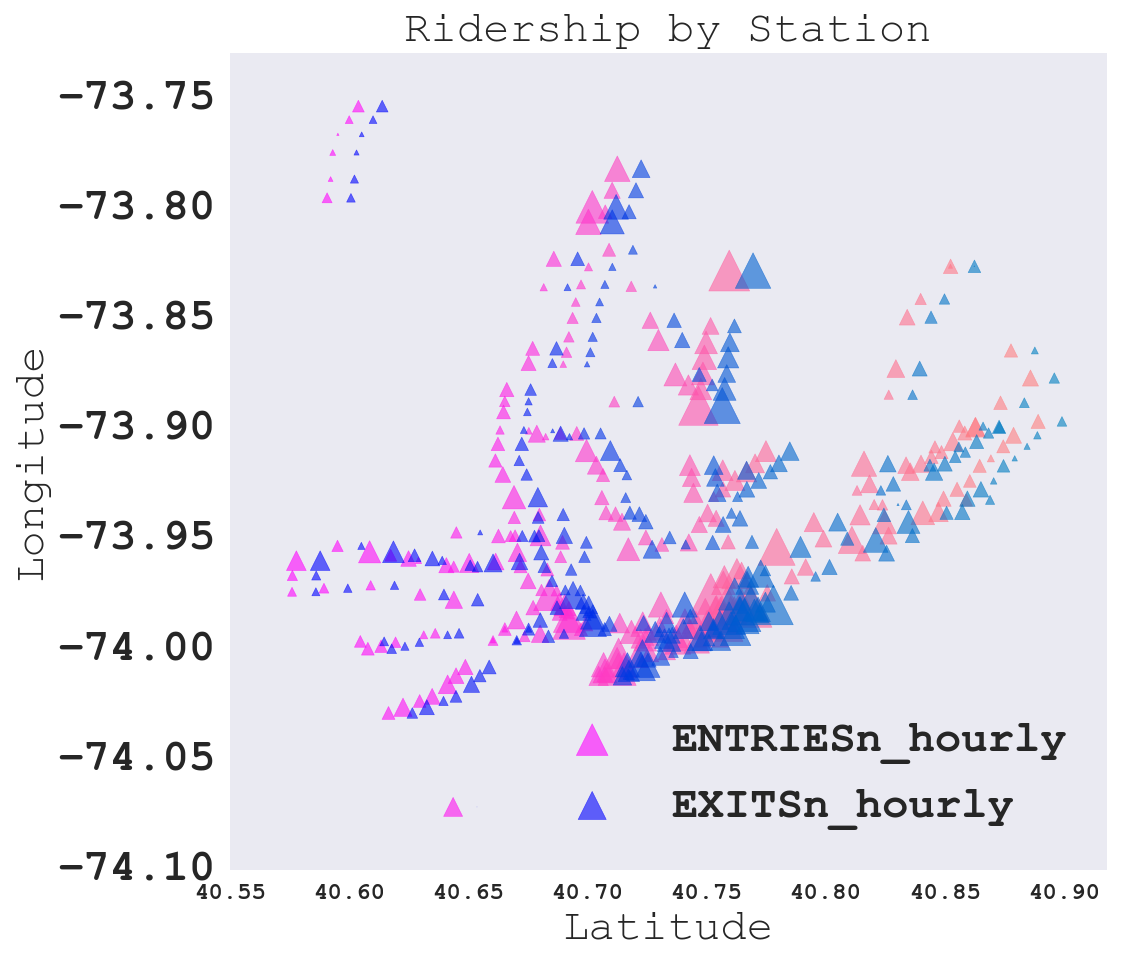

In [755]:
x = scatter_df['latitude']
y = scatter_df['longitude']
t1 = plt.cm.spring(np.linspace(0, 0.5, len(x)))
plt.scatter(x, y, s=scatter_df['ENTRIESn_hourly'] * 0.05, alpha=0.6,  marker='^', c=t1)
x = scatter_df['latitude'] + 0.01
t2 = plt.cm.winter(np.linspace(0, 0.5, len(x)))
plt.scatter(x, y, s=scatter_df['EXITSn_hourly'] * 0.05, alpha=0.6,  marker='^', c=t2)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Ridership by Station')
# plt.tight_layout()
plt.grid(False)
plt.legend(['ENTRIESn_hourly', 'EXITSn_hourly'])
plt.show()

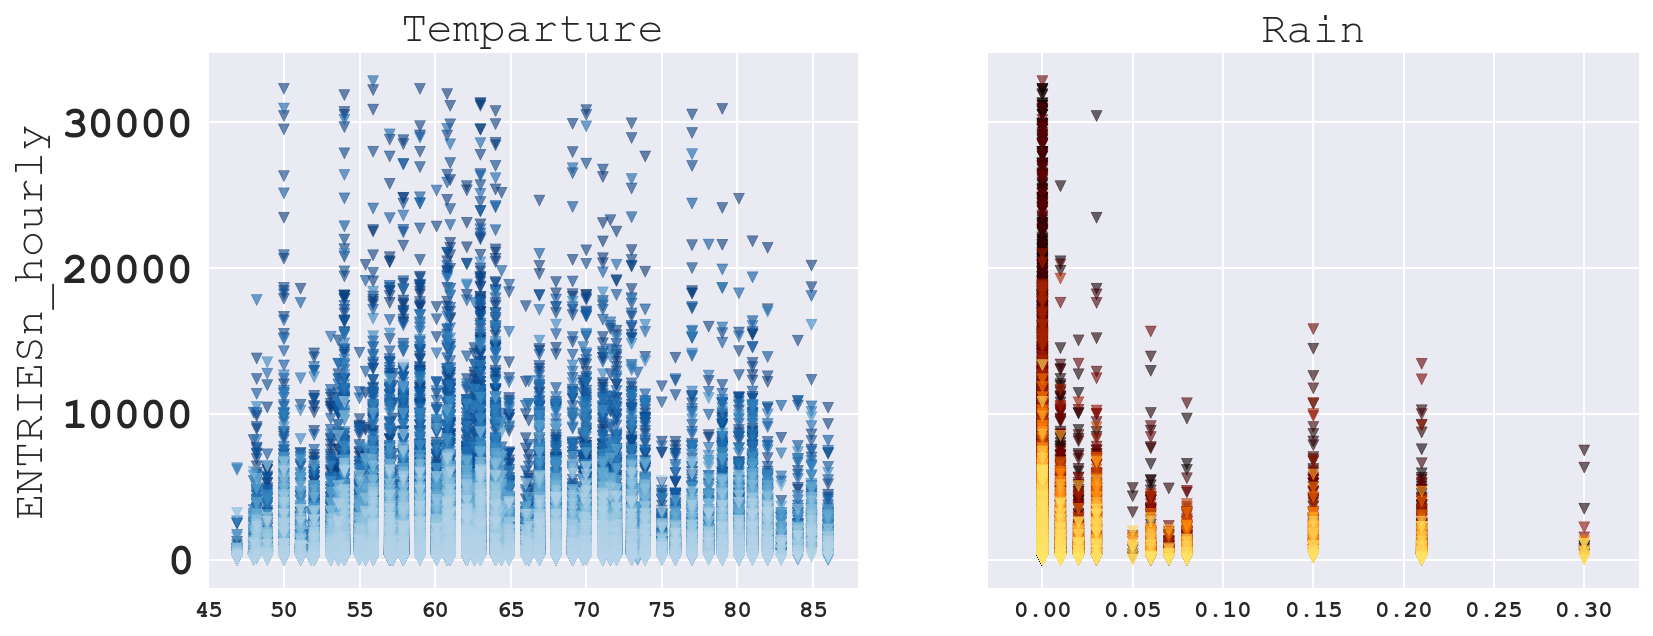

In [756]:
# rcParams['figure.figsize'] = 12, 7
y = weather_data['ENTRIESn_hourly']
x = weather_data['tempi']
rcParams['figure.figsize'] = 7, 7
fig, ax = plt.subplots(1, 2, sharey=True)

col = plt.cm.Blues_r(np.linspace(0, 0.7, len(x)))
ax[0].scatter(x, y, alpha=0.6, marker='v', c=col, s=30)
ax[0].set_title('Temparture')
x = weather_data['precipi']
col = plt.cm.afmhot(np.linspace(0, 0.7, len(x)))
ax[1].scatter(x, y, alpha=0.6, marker='v', c=col, s=30)
ax[1].set_title('Rain')
fig.subplots_adjust(top=0.6, right=1.5)
ax[0].set_ylabel('ENTRIESn_hourly')
# plt.tight_layout()
# plt.legend()
plt.show()



# x = np.linspace(0, 2 * np.pi, 400)
# y = np.sin(x ** 2)
# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# ax1.plot(x, y)
# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)
# plt.show()

In [757]:
import seaborn as sns
sns.set_style('dark')

/Users/mayukhsarkar/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


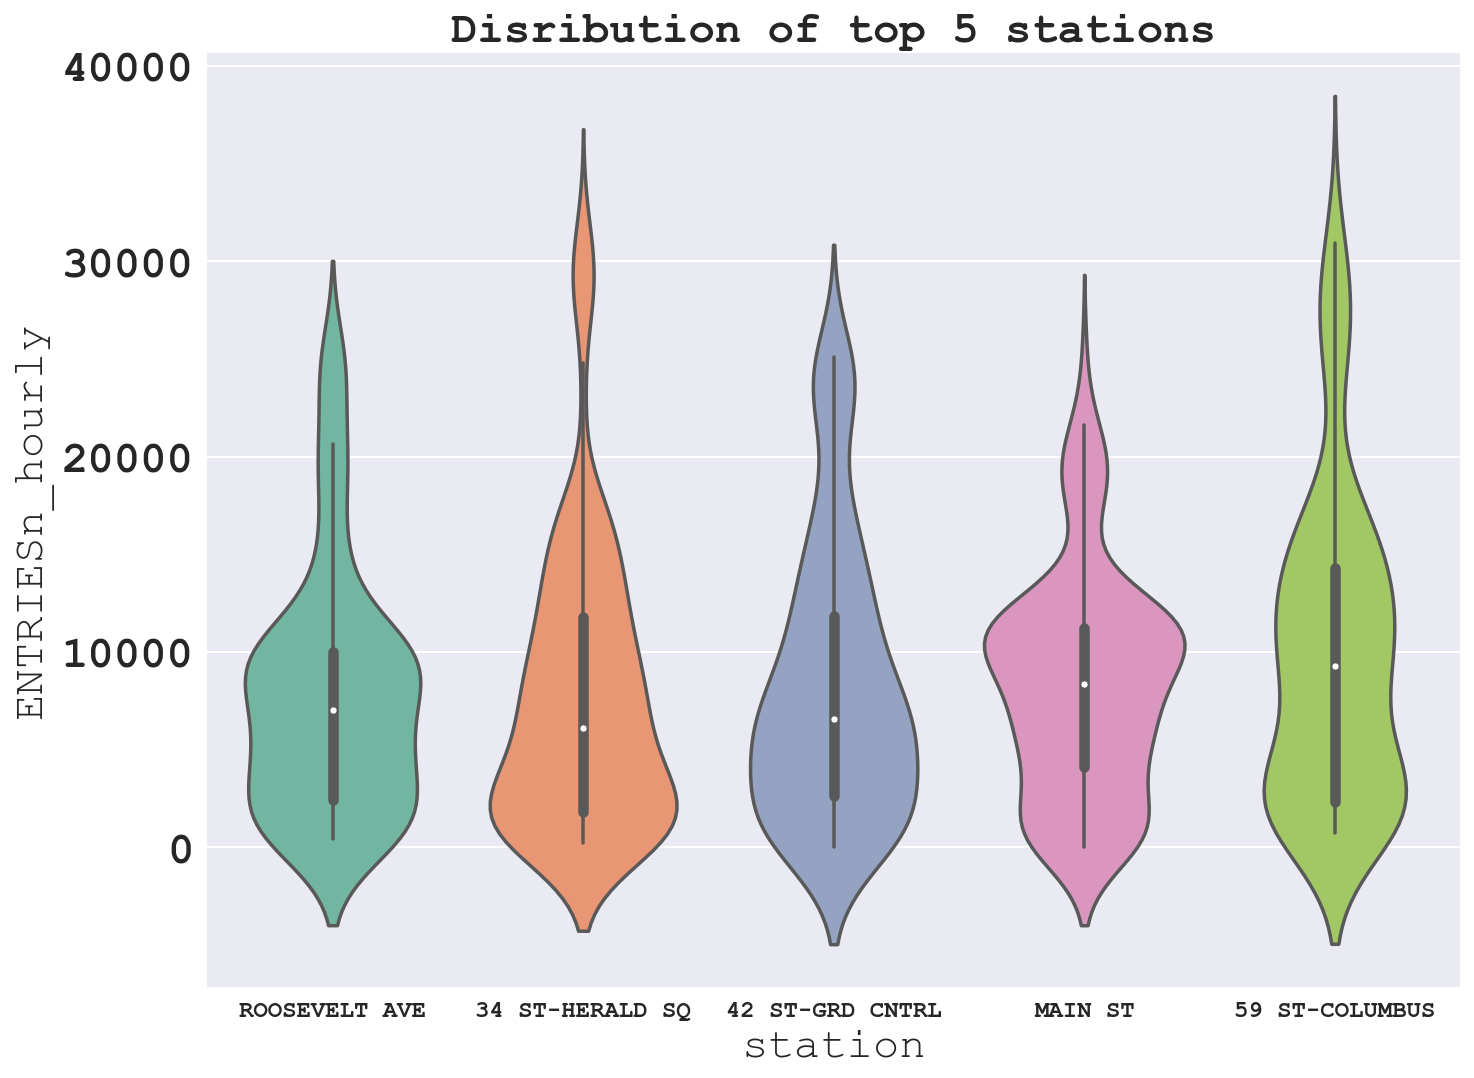

In [824]:
rc={'font.size': 22, 'axes.labelsize': 22, 'legend.fontsize': 22.0, 
    'axes.titlesize': 22, 'xtick.labelsize': 12, 'ytick.labelsize': 22,
    'font.family':'monospace', 'font.monospace': 'Courier New'}
plt.rcParams.update(**rc)
sns.set(rc=rc)
# sns.set_style('white')
rcParams['figure.figsize'] = 10, 8
k = weather_data.loc[weather_data['station'].isin(top_entry_stations)]
k.sort(columns='ENTRIESn_hourly', inplace=False, ascending=False)
ax = sns.violinplot(x='station', y='ENTRIESn_hourly', data=k, palette="Set2")
ax.set_title('Disribution of top 5 stations',  fontweight='bold', fontsize=22)

plt.show()
# rcParams.values 

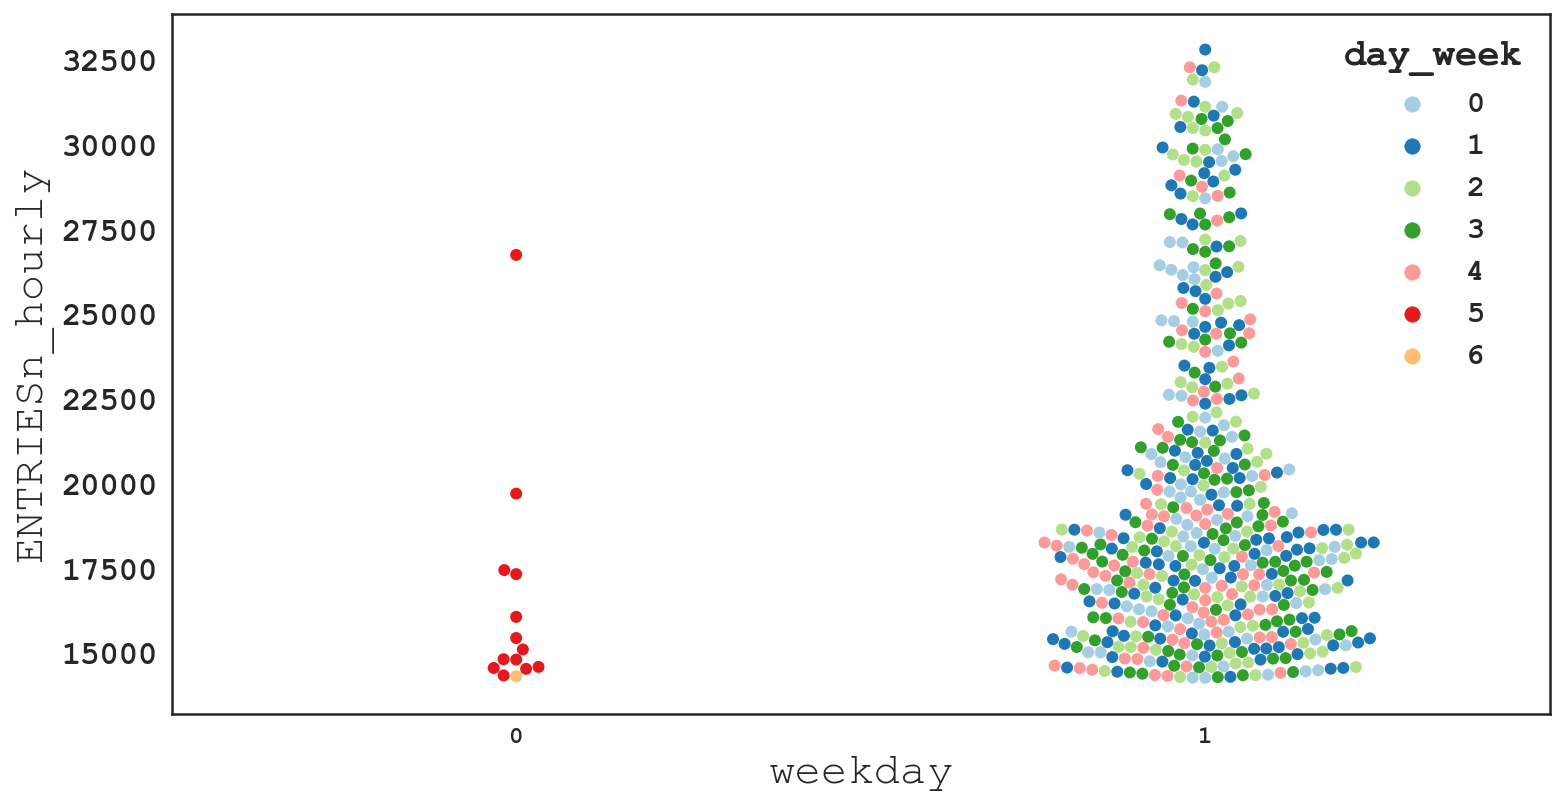

In [821]:
sns.set_style('white')
rc={'font.size': 22, 'axes.labelsize': 22, 'legend.fontsize': 22.0, 
    'axes.titlesize': 22, 'xtick.labelsize': 12, 'ytick.labelsize': 16,
    'font.family':'monospace', 'font.monospace': 'Courier New',
    'legend.fontsize': 15.0, 'figure.figsize': [11, 6]}
# rcParams[] = 55, 5
plt.rcParams.update(**rc)
sns.set_style('white', rc=rc)

# sns.swarmplot(x=d['ENTRIESn_hourly'])
# # plt.legend(loc="best")
# plt.show()

# display(weather_data)
weather_data.sort_values(['ENTRIESn_hourly', 'EXITSn_hourly'], inplace=True, ascending=[False, False])
# display(weather_data)
# weather_data.sort_values(['day_week'], inplace=True, ascending=True)
# day = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
# weather_data['day_week'] = weather_data['day_week'].apply(lambda e: day[int(e)])
# display(weather_data)
sns.swarmplot(x="weekday", y="ENTRIESn_hourly", data=weather_data.head(n=500), size=6, hue="day_week", palette="Paired")
plt.show()